#### Цель работы:

Провести разведывательный анализ данных для проекта изучения влияния условий жизни учащихся на них успеваемость по математике.


In [1]:
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# надо больше столбцов для отображения датасета
pd.options.display.max_columns = 30

In [3]:
# загрузим и посмотрим что на входе
raw_data = pd.read_csv('stud_math.csv')
raw_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


#### Описание датасета
- school — аббревиатура школы, в которой учится ученик
- sex — пол ученика ('F' - женский, 'M' - мужской)
- age — возраст ученика (от 15 до 22)
- address — тип адреса ученика ('U' - городской, 'R' - за городом)
- famsize — размер семьи('LE3' <= 3, 'GT3' >3)
- Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
- Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
- Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
- reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
- guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
- traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
- studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
- failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
- schoolsup — дополнительная образовательная поддержка (yes или no)
- famsup — семейная образовательная поддержка (yes или no)
- paid — дополнительные платные занятия по математике (yes или no)
- activities — дополнительные внеучебные занятия (yes или no)
- nursery — посещал детский сад (yes или no)
- higher — хочет получить высшее образование (yes или no)
- internet — наличие интернета дома (yes или no)
- romantic — в романтических отношениях (yes или no)
- famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
- freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
- goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
- health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
- absences — количество пропущенных занятий
- score — баллы по госэкзамену по математике

In [4]:
raw_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

- считалось 13 числовых и 17 нечисловых столбцов
- есть малочисленные пропуски во многих столбцах
- по смыслу все столбцы, кроме (age, absences, score) - категориальные (номинативные)
- смысл столбца "studytime, granular" не ясен, описания нет. Если не получим объяснения из источника датасета, то удаляем

In [5]:
# посмотрим на "числовые" параметры
raw_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


- в столбце Fedu есть значения выше описанного диапазона 0-4
- в столбце famrel есть значения ниже диапазона 1-5
- в столбце absences есть подозрительно большие значения

In [6]:
# посмотрим на нечисловые параметры
raw_data.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


- видно что по параметрам мало уникальных значений (от 2 до 5)
- будем категоризировать все параметры

In [7]:
# посмотрим долю строк с неполными данными
round(raw_data[raw_data.isna().max(axis=1)].shape[0] / raw_data.shape[0], 2)

0.75

3/4 строк имеют какие-либо пропуски. Будем не выкидывать данные, а заполнять пропуски. Постараемся минимально искажать данные.

In [8]:
# копируем сырые данные, удаляя непонятный столбец
data = raw_data.drop(columns='studytime, granular')

In [9]:
# делаем читабельнее названия столбцов
columns_to_rename = {
    'famsize': 'family_size',
    'Pstatus': 'parents_live',
    'Medu': 'mother_education',
    'Fedu': 'father_education',
    'Mjob': 'mother_job',
    'Fjob': 'father_job',
    'schoolsup': 'education_support',
    'famsup': 'family_support',
    'paid': 'math_paid_lessons',
    'nursery': 'kindergarten',
    'famrel': 'family_relations',
    'goout': 'friends_time'
}
data.rename(columns=columns_to_rename, inplace=True)

In [10]:
# посмотрим что в father_education выходит за предел
data['father_education'].value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: father_education, dtype: int64

In [11]:
# есть одно значение 40, будем считать, что это опечатка и должно быть 4
data['father_education'].replace(40, 4, inplace = True)

In [12]:
# посмотрим что в family_relations выходит за предел
data['family_relations'].value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: family_relations, dtype: int64

In [13]:
# есть одно значение -1, будем считать, что это опечатка и должно быть 1
data['family_relations'].replace(-1, 1, inplace = True)

<AxesSubplot:>

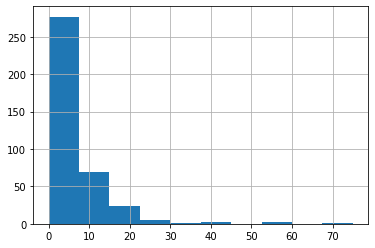

In [14]:
# посмотрим что в absences по распределению гистограммы
data['absences'][data['absences'] < 100].hist()
# data['absences'].value_counts().sort_values()

In [15]:
# видно, что есть большой хвост распределения
# исходя из здравого смысла оставим только значения < 40
data = data[data['absences'] < 35]
data.shape[0]

376

остались почти все строки

5


<AxesSubplot:>

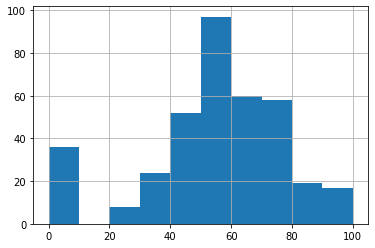

In [16]:
# посмотрим, что с целевым результатом
print(data['score'].isna().sum())
data['score'].hist()

- среди записей есть почти 40 значений 0, похоже, что это не сдававшие экзамен
- распредеделение остальных значений похоже на нормальное
- есть 6 записей с пропущенными значениями, для безопасности заменим их нулями

In [17]:
data['score'] = data['score'].fillna(0)

In [18]:
# разбираемся с NaN в численных столбцах
numeric_columns = ['age', 'absences', 'score']
# в столбце age пропусков не было
# пропуски в остальных столбцах заполним медианными значениями
for i_column in numeric_columns:
    data[i_column] = data[i_column].fillna(data[i_column].median())

In [19]:
# в нашем датасете все числовые столбцы можно перевести в unsigned int
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, downcast='unsigned')

In [20]:
# категоризируем столбцы, которые распознались, как числа
numeric_to_category_columns = ['mother_education', 'father_education', 'traveltime',
                               'studytime', 'failures', 'family_relations', 'freetime', 'friends_time', 'health']
# заполним пропуски модой
for i_column in numeric_to_category_columns:
    data[i_column] = data[i_column].fillna(data[i_column].mode()[0])
# переведём в категориальный тип
data[numeric_to_category_columns] = data[numeric_to_category_columns].astype(
    'uint8').astype('category')
# внесём пояснения там, где можем
data['mother_education'] = data['mother_education'].cat.rename_categories(
    {0: 'no', 1: '1-4 grades', 2: '5-9 grades', 3: 'spec or 11 grades', 4: 'higher'})
data['father_education'] = data['father_education'].cat.rename_categories(
    {0: 'no', 1: '1-4 grades', 2: '5-9 grades', 3: 'spec or 11 grades', 4: 'higher'})
data['traveltime'] = data['traveltime'].cat.rename_categories(
    {1: '< 15 min', 2: '15-30 min', 3: '30-60 min', 4: '> 60 min'})
data['studytime'] = data['studytime'].cat.rename_categories(
    {1: '< 2 h', 2: '2-5 h', 3: '5-10 h', 4: '> 10 h'})
data['failures'] = data['failures'].cat.rename_categories(
    {0: 'other', 1: '1', 2: '2', 3: '3'})

In [21]:
# категоризируем все остальные столбцы
object_to_category_columns = list(data.select_dtypes(include='object'))
# заполним пропуски модой
for i_column in object_to_category_columns:
    data[i_column] = data[i_column].fillna(data[i_column].mode()[0])
# переведём в категориальный тип
data[object_to_category_columns] = data[object_to_category_columns].astype('category')

In [22]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 394
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   school             376 non-null    category
 1   sex                376 non-null    category
 2   age                376 non-null    uint8   
 3   address            376 non-null    category
 4   family_size        376 non-null    category
 5   parents_live       376 non-null    category
 6   mother_education   376 non-null    category
 7   father_education   376 non-null    category
 8   mother_job         376 non-null    category
 9   father_job         376 non-null    category
 10  reason             376 non-null    category
 11  guardian           376 non-null    category
 12  traveltime         376 non-null    category
 13  studytime          376 non-null    category
 14  failures           376 non-null    category
 15  education_support  376 non-null    category
 16  family_s

- пропуски заполнили
- типы привели к численным и категориальным
- значительно сократили объем памяти под датасет

,age,absences,score
age,1.000000,0.150931,-0.172179
absences,0.150931,1.000000,0.071198
score,-0.172179,0.071198,1.000000


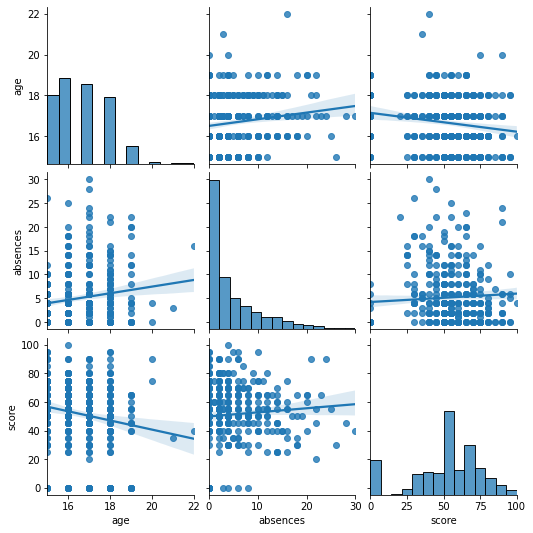

In [23]:
# посмотрим что с корреляцией численных параметров
display(data.corr())
sns.pairplot(data, kind='reg')

Есть слабая отрицательная корреляция возраста и пропусков на результат. Оставим эти данные для моделирования.

In [24]:
# вывод ящика-с-усами для score при разных признаках
def show_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score', ax=ax, data=data)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

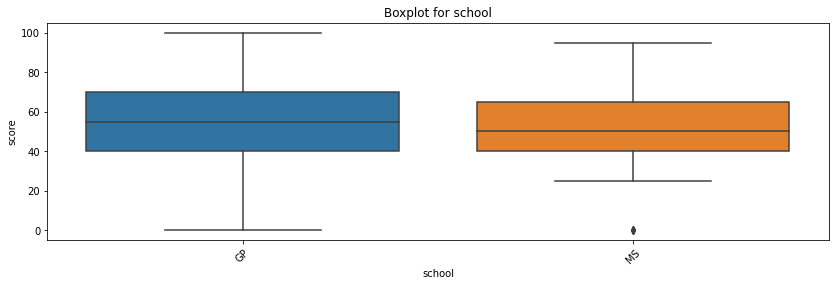

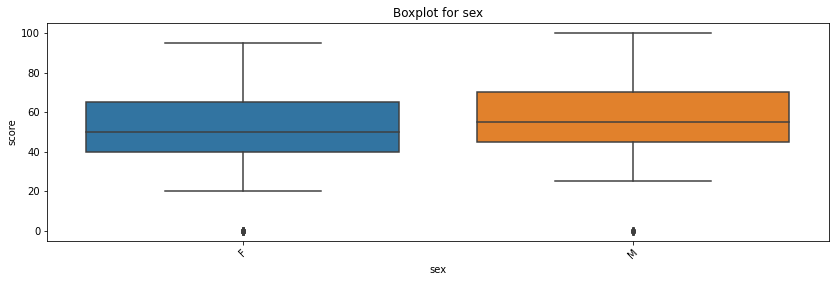

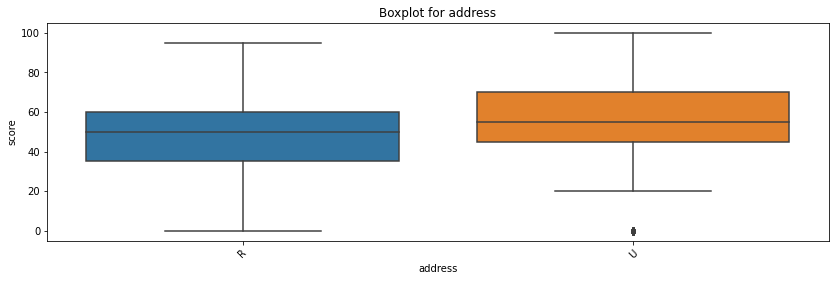

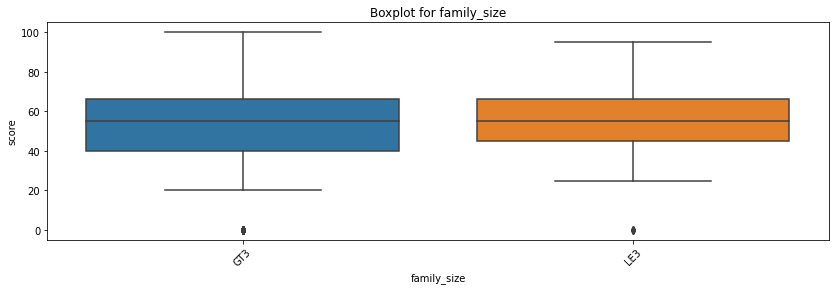

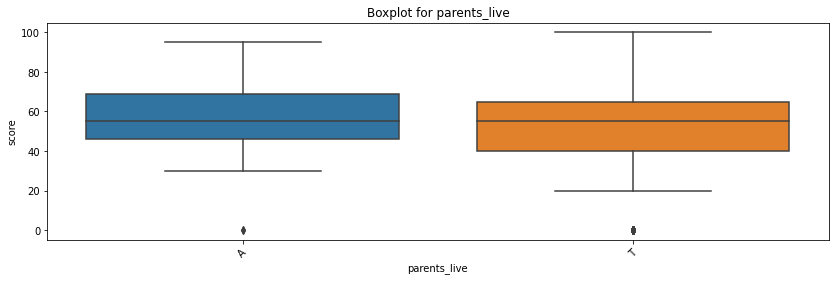

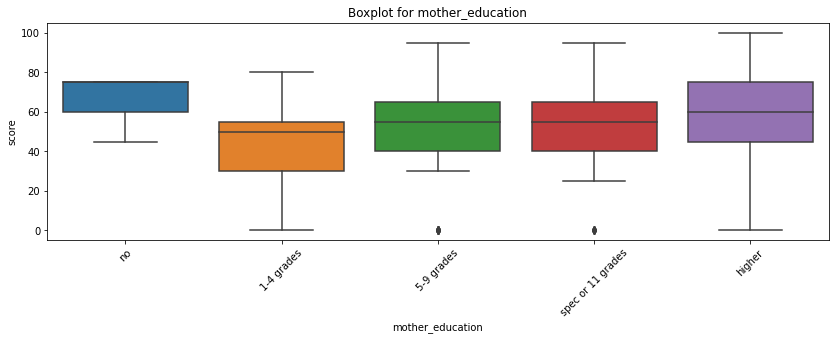

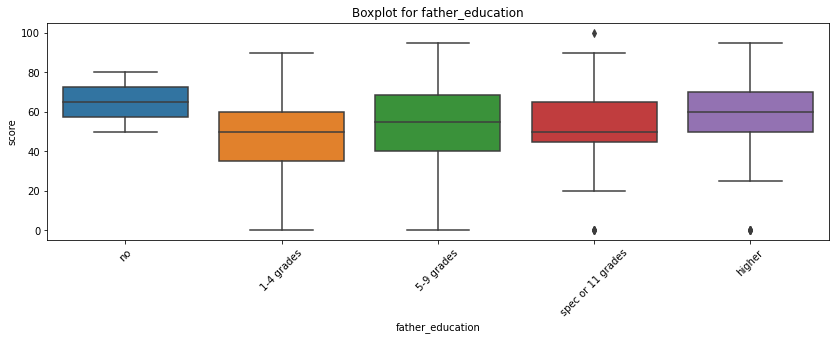

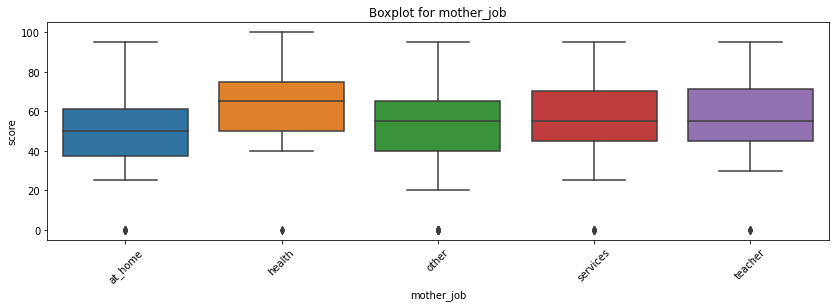

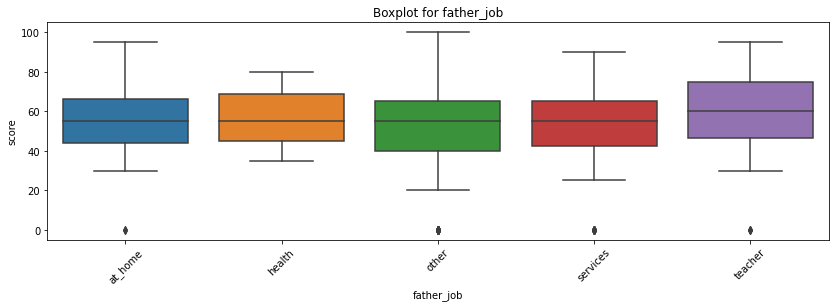

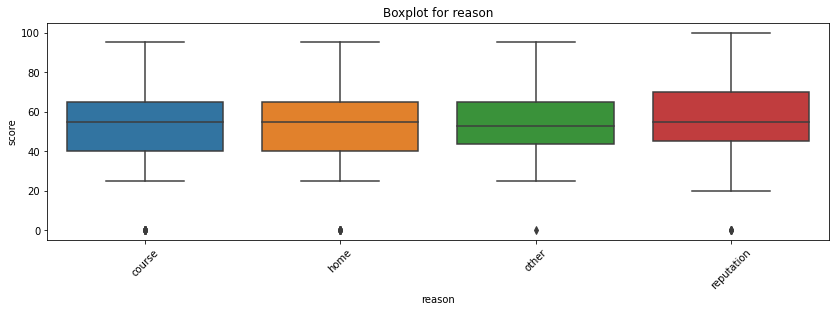

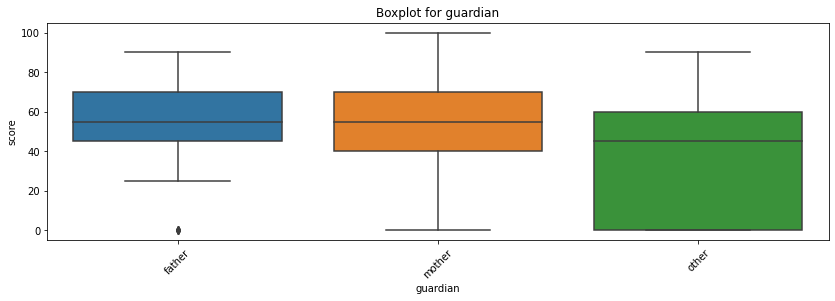

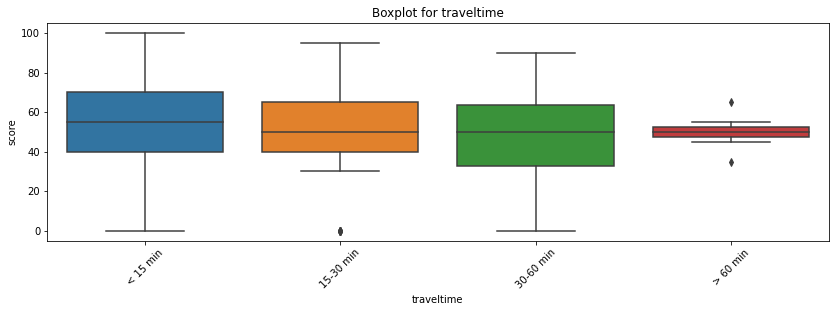

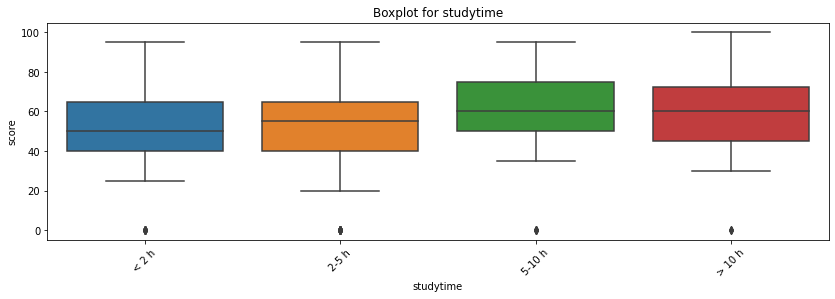

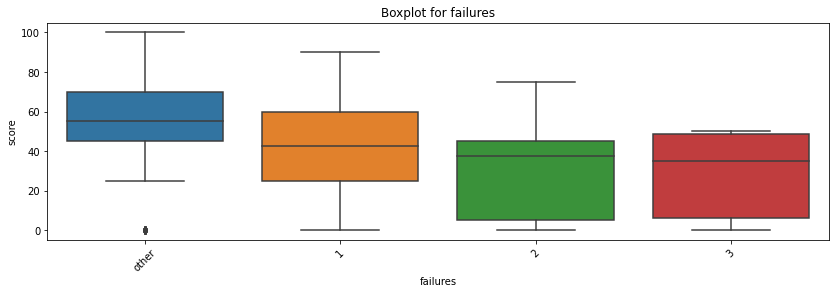

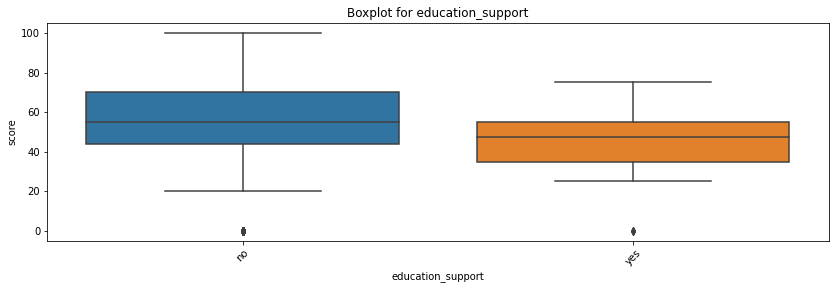

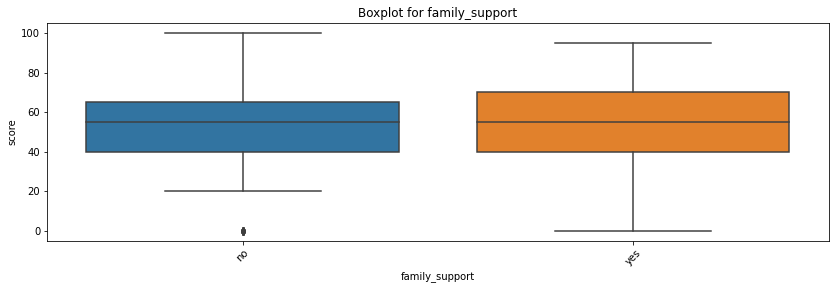

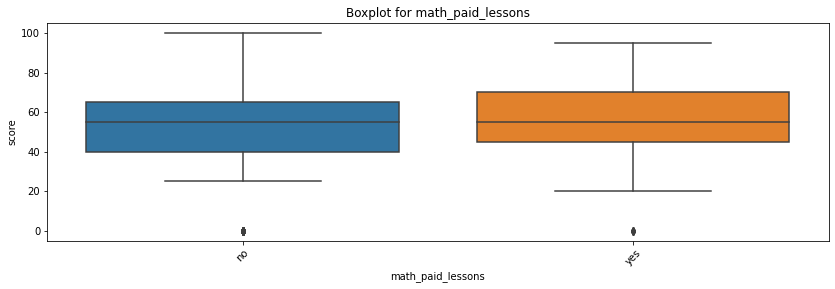

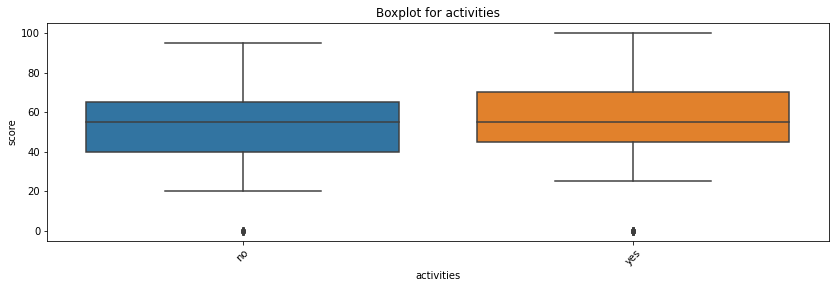

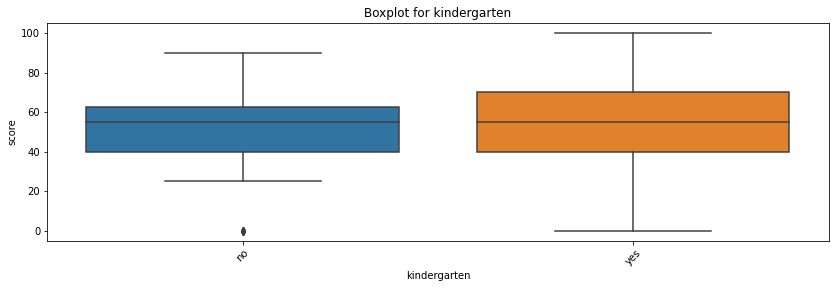

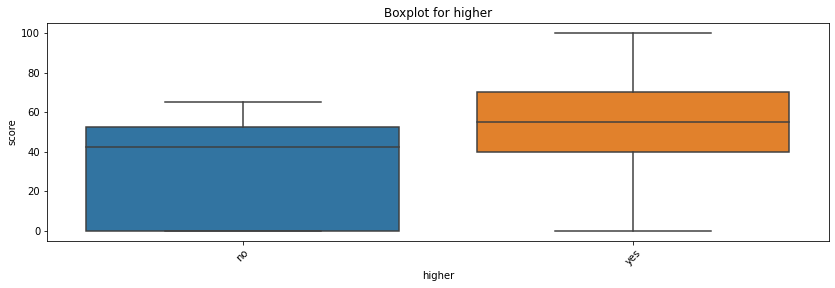

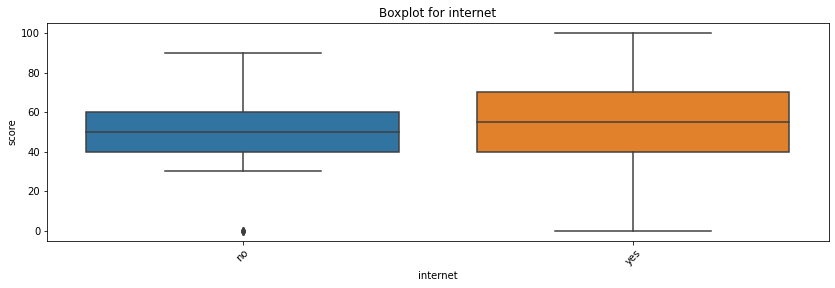

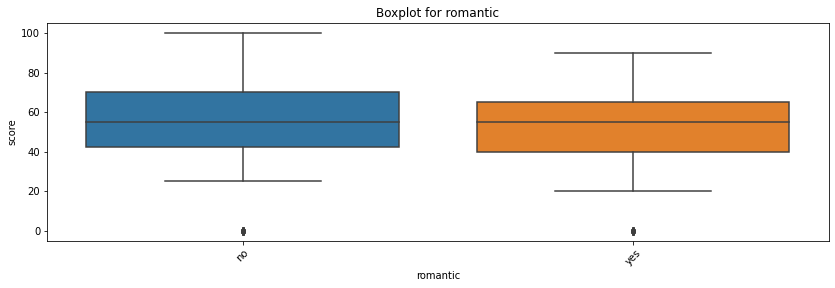

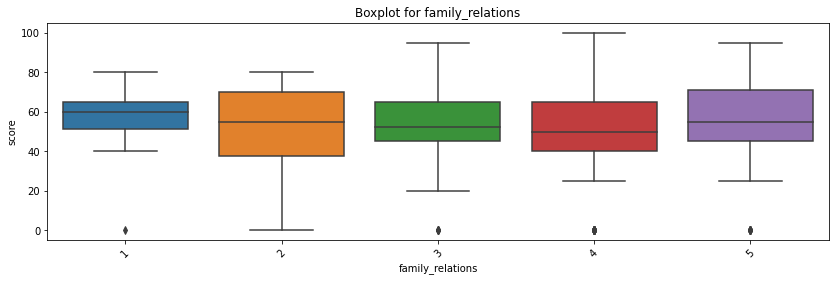

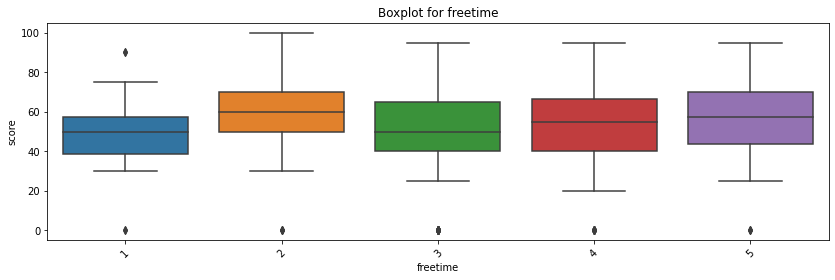

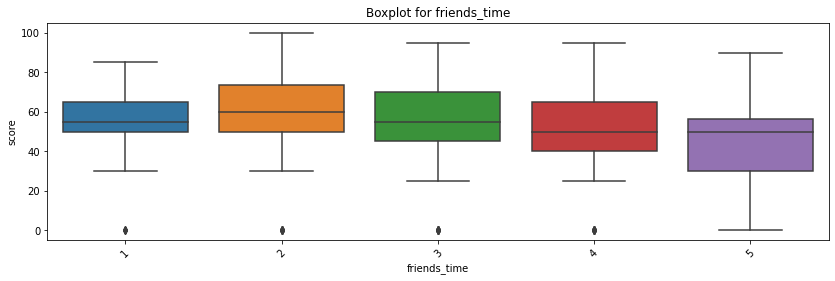

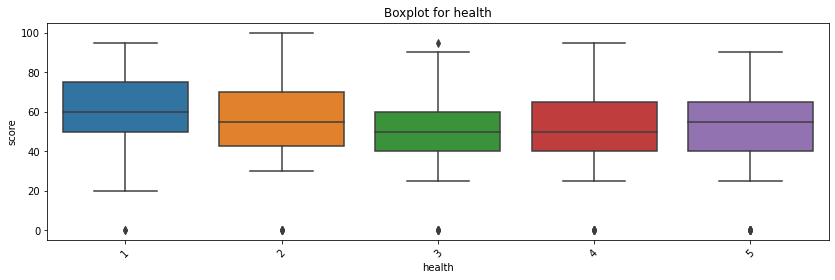

In [25]:
# посмотрим что для категорийных признаков
category_columns = list(data.select_dtypes(include='category'))
for i_column in category_columns:
    show_boxplot(i_column)

На внешний вид нет однозначно влияющих или не влияющих признаков. Посмотрим численно.

In [26]:
# тест Стьюдента на различные признаки
# H0 - распределение по признаку неразличимо
# HA - распределение по признаку различимо
# уровень значимости 5%
def get_stat_dif(column):
    pairs_all = list(itertools.combinations(
        data[column].value_counts().index, 2))
    for pair in pairs_all:
        p_value = ttest_ind(data.loc[data[column] == pair[0], 'score'],
                            data.loc[data[column] == pair[1], 'score']).pvalue
        if p_value <= 0.05 / len(pairs_all):  # поправка Бонферони
            print('Найдены статистически значимые различия для столбца', column)
            break

In [27]:
# посмотрим что выходит
for i_column in category_columns:
    get_stat_dif(i_column)

Найдены статистически значимые различия для столбца sex
Найдены статистически значимые различия для столбца address
Найдены статистически значимые различия для столбца mother_education
Найдены статистически значимые различия для столбца mother_job
Найдены статистически значимые различия для столбца failures
Найдены статистически значимые различия для столбца education_support
Найдены статистически значимые различия для столбца math_paid_lessons
Найдены статистически значимые различия для столбца higher
Найдены статистически значимые различия для столбца romantic
Найдены статистически значимые различия для столбца friends_time


In [28]:
# Оставим для моделирования возраст, найденные категориальные параметры и результат
model_columns = ['age', 'sex', 'address', 'mother_education', 'mother_job',
                 'guardian', 'failures', 'education_support', 'math_paid_lessons', 
                 'higher', 'romantic', 'friends_time', 'absences', 'score']
model_data = data[model_columns].copy(deep=True)

In [29]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 394
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                376 non-null    uint8   
 1   sex                376 non-null    category
 2   address            376 non-null    category
 3   mother_education   376 non-null    category
 4   mother_job         376 non-null    category
 5   guardian           376 non-null    category
 6   failures           376 non-null    category
 7   education_support  376 non-null    category
 8   math_paid_lessons  376 non-null    category
 9   higher             376 non-null    category
 10  romantic           376 non-null    category
 11  friends_time       376 non-null    category
 12  absences           376 non-null    uint8   
 13  score              376 non-null    uint8   
dtypes: category(11), uint8(3)
memory usage: 17.9 KB


#### Вывод
Пропуски заполнили. Выбросы убрали. Для моделирования оставляем 13 параметров.